In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Crop and fertilizer dataset.csv")
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [5]:
df = df.drop(["Link"], axis=1)
df

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea
...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP


In [6]:
df["Soil_color"] = df["Soil_color"].str.strip()
df["Soil_color"].unique()

array(['Black', 'Red', 'Medium Brown', 'Dark Brown', 'Light Brown',
       'Reddish Brown'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

#Kolom yang akan di-encode
kolom_encode = ['Crop', 'Fertilizer', 'Soil_color','District_Name']

# Inisialisasi LabelEncoder
encoder_dict = {}

# Membuat dictionary untuk menyimpan korespondensi nilai asli dan nilai terkodena
for kolom in kolom_encode:
    encoder = LabelEncoder()
    df[kolom+'_encoded'] = encoder.fit_transform(df[kolom])
    encoder_dict[kolom] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Menggantikan nilai asli dengan nilai terkode pada kolom asli
for kolom in kolom_encode:
    df[kolom] = df[kolom+'_encoded']
    df.drop(columns=[kolom+'_encoded'], inplace=True)

# Menampilkan DataFrame dengan data yang telah diencode
print("DataFrame dengan data yang telah diencode:")
print(df)

# Menampilkan dictionary korespondensi nilai asli dan nilai terkodena
print("\nDictionary korespondensi nilai asli dan nilai terkodena:")
print(encoder_dict)

DataFrame dengan data yang telah diencode:
      District_Name  Soil_color  Nitrogen  Phosphorus  Potassium   pH  \
0                 0           0        75          50        100  6.5   
1                 0           0        80          50        100  6.5   
2                 0           0        85          50        100  6.5   
3                 0           0        90          50        100  6.5   
4                 0           0        95          50        100  6.5   
...             ...         ...       ...         ...        ...  ...   
4508              1           0       130          80        150  7.0   
4509              1           0       135          80        150  7.0   
4510              1           0       140          80        150  7.0   
4511              1           0       145          80        150  7.0   
4512              1           0       150          80        150  7.0   

      Rainfall  Temperature  Crop  Fertilizer  
0         1000           20    1

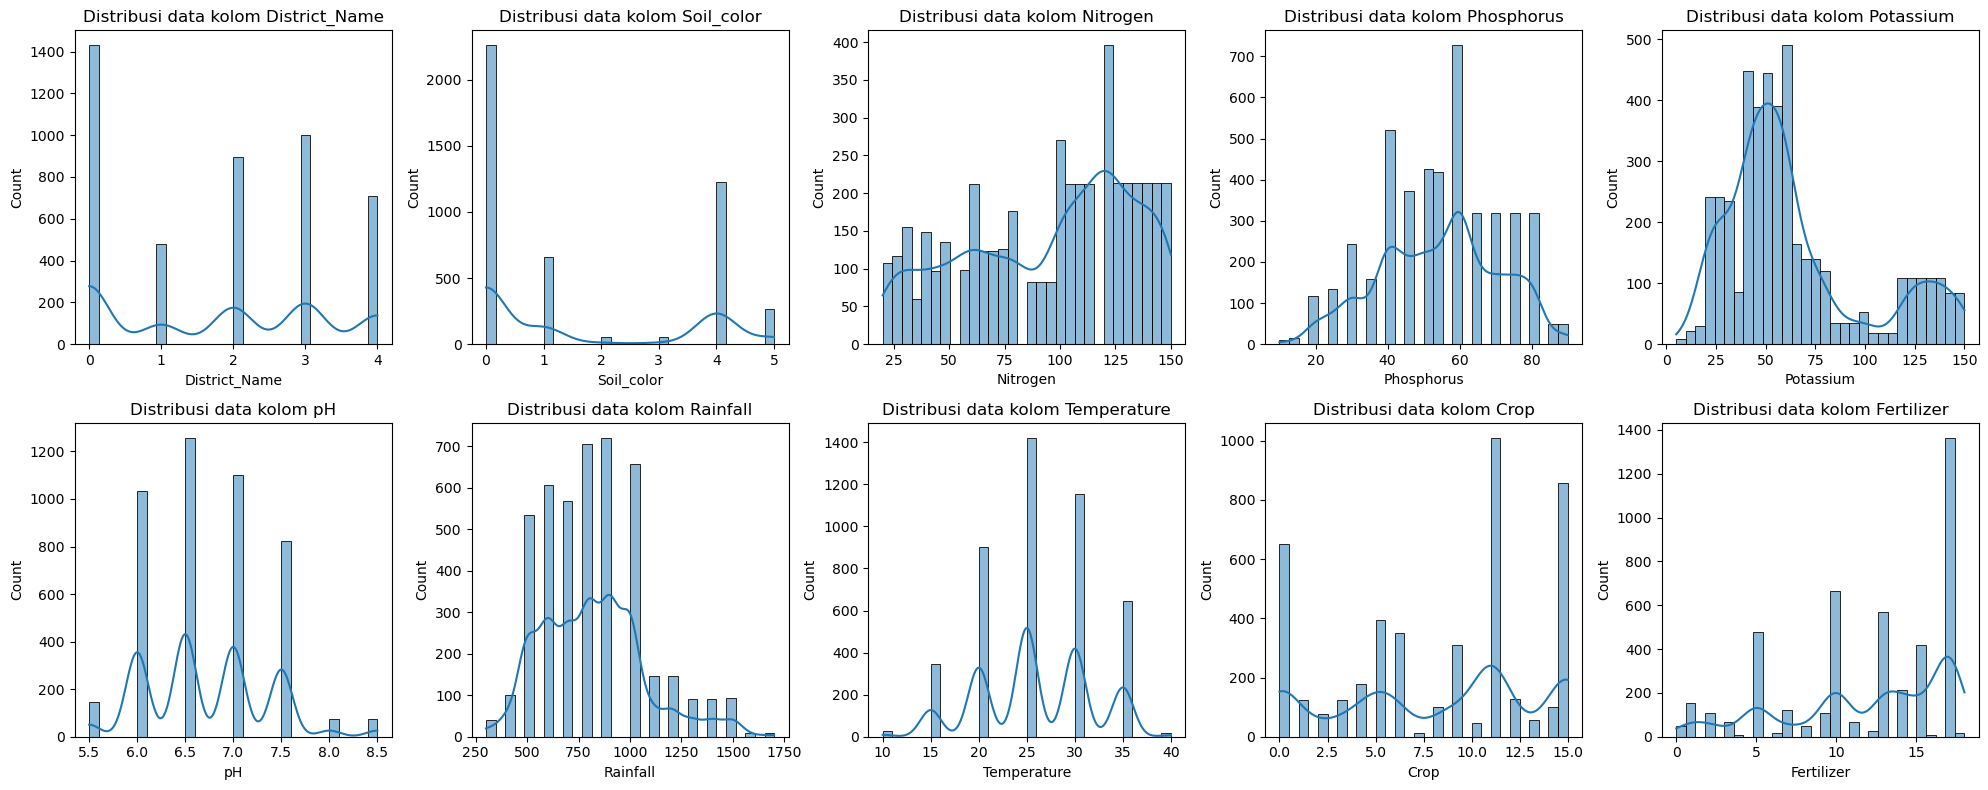

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Loop through all columns in the dataframe
# for column in df.columns:
#     # Check if the column is of numeric data type
#     if df[column].dtype in ['int64', 'float64']:
#         plt.figure(figsize=(10, 4))
#         sns.histplot(df[column], kde=True, bins=30)
#         plt.title('Distribusi data kolom ' + column)
#         plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan jumlah kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.shape[0]

# Mengatur ukuran subplot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Loop through all columns in the dataframe
for i, column in enumerate(df.columns):
    # Check if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64','int32']:
        # Menghitung indeks baris dan kolom untuk subplot
        row = i // 5
        col = i % 5
        sns.histplot(df[column], kde=True, bins=30, ax=axs[row, col])
        axs[row, col].set_title('Distribusi data kolom ' + column)

plt.tight_layout()
plt.show()


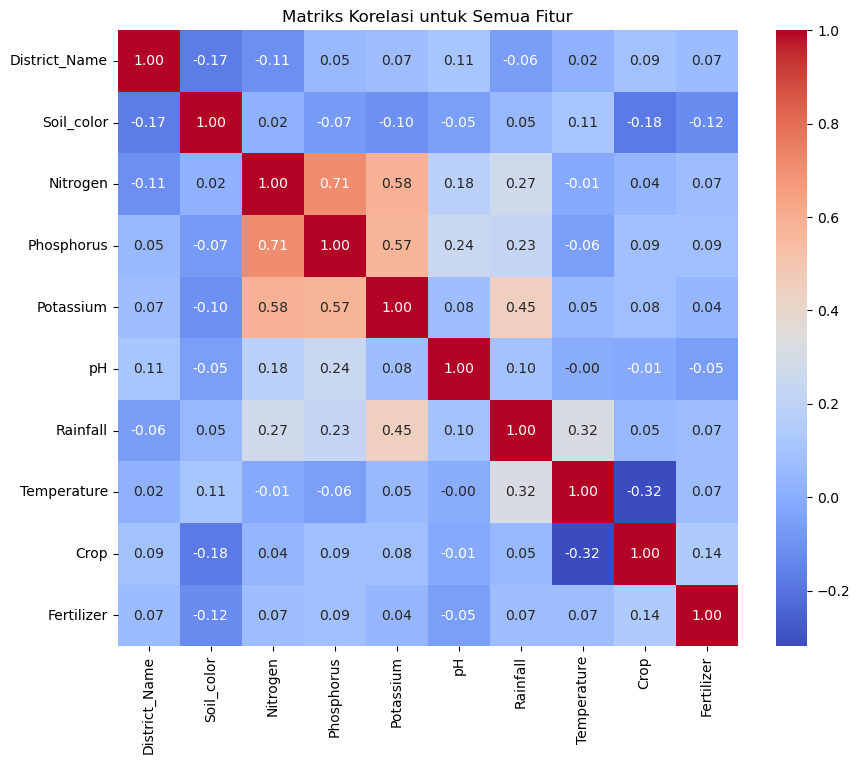

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi untuk Semua Fitur')
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   int32  
 1   Soil_color     4513 non-null   int32  
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   int32  
 9   Fertilizer     4513 non-null   int32  
dtypes: float64(1), int32(4), int64(5)
memory usage: 282.2 KB


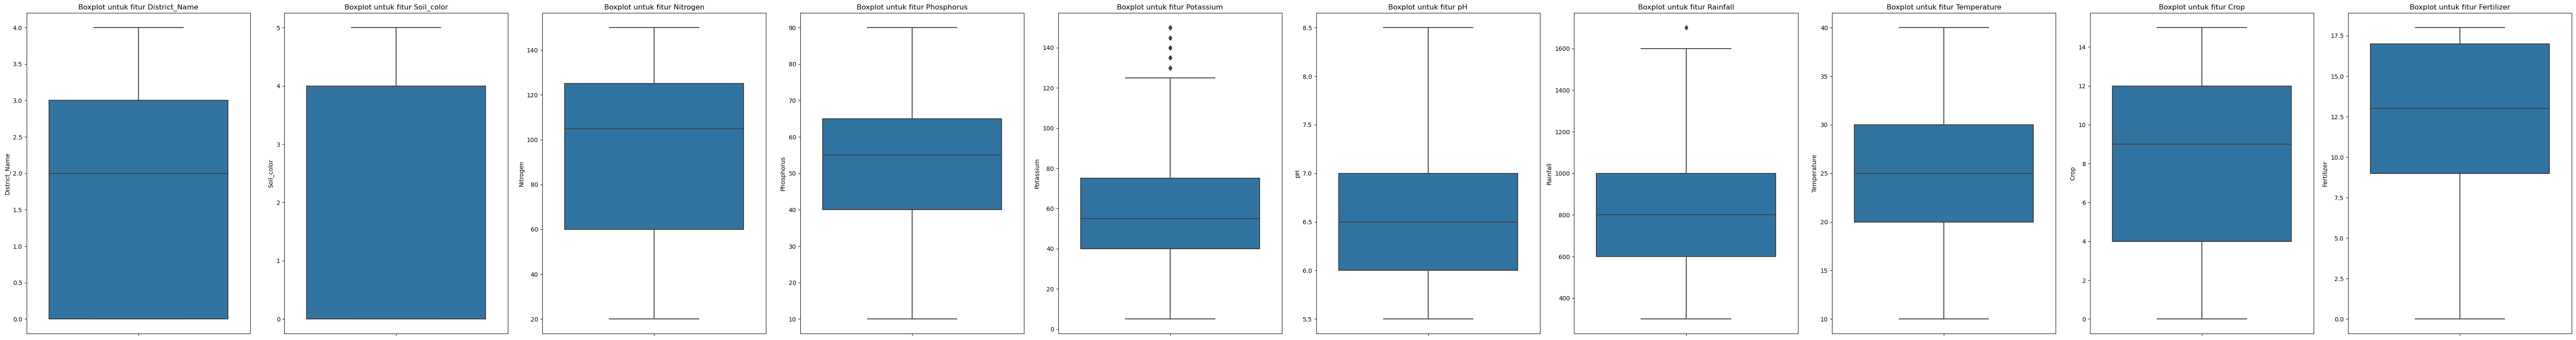

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Loop through all columns in the dataframe
# for column in df.columns:
#     # Check if the column is of numeric data type
#     if df[column].dtype in ['int64', 'float64','int32']:
#         plt.figure(figsize=(10, 6))
#         sns.boxplot(x=df[column])
#         plt.title('Boxplot untuk fitur ' + column)
#         plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan jumlah kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.shape[0]

# Mengatur ukuran subplot
fig, axs = plt.subplots(1, num_cols, figsize=(6*num_cols, 8))

# Loop through all columns in the dataframe
for i, column in enumerate(df.columns):
    # Check if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64','int32']:
        sns.boxplot(y=df[column], ax=axs[i])
        axs[i].set_title('Boxplot untuk fitur ' + column)

plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = df.drop(columns=['Fertilizer'])  # Memilih semua fitur kecuali target 'Fertilizer'
y = df['Fertilizer']


In [13]:


# Standardization
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# Display standardized features
print("Hasil standarisasi fitur:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Hasil standarisasi fitur:
   District_Name  Soil_color  Nitrogen  Phosphorus  Potassium        pH  \
0       -1.21581   -0.834035 -0.536307   -0.262348   1.020087 -0.344356   
1       -1.21581   -0.834035 -0.404923   -0.262348   1.020087 -0.344356   
2       -1.21581   -0.834035 -0.273539   -0.262348   1.020087 -0.344356   
3       -1.21581   -0.834035 -0.142155   -0.262348   1.020087 -0.344356   
4       -1.21581   -0.834035 -0.010772   -0.262348   1.020087 -0.344356   

   Rainfall  Temperature     Crop  
0  0.718351     -1.00313  0.53726  
1  0.718351     -1.00313  0.53726  
2  0.718351     -1.00313  0.53726  
3  0.718351     -1.00313  0.53726  
4  0.718351     -1.00313  0.53726  


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state = 42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN:", accuracy_knn)
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))

Akurasi KNN: 0.9697193500738552

Classification Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.98      0.99        42
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00         3
           5       0.97      0.99      0.98       142
           6       1.00      1.00      1.00         4
           7       0.95      1.00      0.98        40
           8       1.00      1.00      1.00        13
           9       0.86      1.00      0.92        30
          10       0.98      0.96      0.97       195
          11       1.00      0.65      0.79        20
          12       1.00      1.00      1.00         6
          13       0.98      0.99      0.98       179
          14       0.99      1.00      0.99        70
          15       0.96      0.92      0.94       118
          16       1.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.930576070901034

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.95      0.94        42
           2       0.90      0.82      0.86        33
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00         3
           5       0.93      0.99      0.96       142
           6       1.00      1.00      1.00         4
           7       0.95      0.97      0.96        40
           8       1.00      1.00      1.00        13
           9       0.67      0.97      0.79        30
          10       0.98      0.93      0.95       195
          11       1.00      0.60      0.75        20
          12       1.00      1.00      1.00         6
          13       0.94      0.97      0.95       179
          14       0.90      0.99      0.94        70
          15       0.92      0.75      0.82       118
  

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Membuat model MLP
mlp = MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000)

# Melatih model MLP
mlp.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred_mlp = mlp.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Akurasi prediksi dengan MLP: {:.2f}%".format(accuracy * 100))

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_mlp)
print("Laporan Klasifikasi:\n", report)

Akurasi prediksi dengan MLP: 55.91%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.44      0.50      0.47        42
           2       0.58      0.42      0.49        33
           3       0.73      0.88      0.80        25
           4       0.50      1.00      0.67         3
           5       0.67      0.67      0.67       142
           6       0.18      0.50      0.27         4
           7       0.94      0.85      0.89        40
           8       0.56      0.38      0.45        13
           9       0.54      0.93      0.68        30
          10       0.51      0.61      0.55       195
          11       0.44      0.40      0.42        20
          12       0.67      1.00      0.80         6
          13       0.59      0.44      0.50       179
          14       0.78      0.36      0.49        70
          15       0.35      0.22      0.27       118
          16       0.00

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",